# Grafiek: tabel
Genereert een tabel met deze kolommen:
* `party`: De partij waar op gestemd is
* `votes`: totaal aantal stemmen
* `5p_votes`: totaal aantal stemmen wat is gegeven in de 5% van de stembureaus waar de meeste stemmen op de partij vandaan komen
* `5p_percentage`: percentage van de totale winst waar die 5% stembureaus voor verantwoordelijk is

In [1]:
DATA_PATH = "../3-pipeline/ps2019-kiesraad-with-locations.csv"
OUT_PATH = "../4-output/parties-5p.csv"
PERCENTAGE = 0.05

from IPython.display import display
import altair as alt
import pandas as pd

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
df = pd.read_csv(DATA_PATH)[["party", "votes"]]
df = df.pivot(columns = "party", values = "votes")
table = pd.DataFrame(index = df.columns, columns = ["votes", "5p_votes", "5p_percentage"])
table["votes"] = df.sum()

for party in df.columns:
    values = df[party].dropna()
    value_count = round(len(values) * PERCENTAGE)
    table.at[party, "values"] = len(values)
    table.at[party, '5p_votes'] = values.nlargest(value_count).sum()
    table.at[party, 'p_no_votes'] = len(values[values == 0]) / len(values)
    
table["5p_percentage"] = table["5p_votes"] / table["votes"]
table["95p_percentage"] = 1 - table["5p_percentage"]
table = table.sort_values("5p_percentage", ascending = False)

# Save and display
table.to_csv(OUT_PATH)
display(table)

,votes,5p_votes,5p_percentage,values,p_no_votes,95p_percentage
party,,,,,,
SGP,199365.0,97399,0.488546,6810.0,0.068576,0.511454
DENK,121753.0,56049,0.46035,9331.0,0.272211,0.53965
CU,372909.0,90082,0.241566,9331.0,0.006966,0.758434
GL,783006.0,136080,0.173792,9331.0,0.001715,0.826208
D66,567363.0,94496,0.166553,9331.0,0.001715,0.833447
CDA,805862.0,128728,0.15974,9331.0,0.000750,0.84026
PvdD,317104.0,45672,0.144028,9331.0,0.001715,0.855972
SP,430096.0,61900,0.143921,9331.0,0.001500,0.856079
PVV,504948.0,71904,0.142399,9331.0,0.002143,0.857601


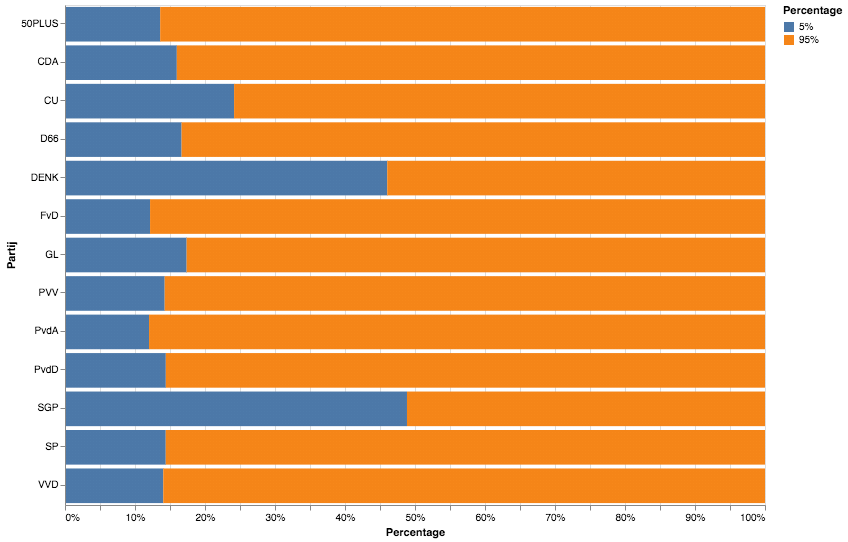

In [3]:
# Show a stacked bar chart
df_dist = []

for row in table.reset_index()[["party", "5p_percentage"]].to_dict('records'):
    (party, perc) = row["party"], row["5p_percentage"]
    
    df_dist += [{"party" : party, "type" : "5%", "perc" : perc}]
    df_dist += [{"party" : party, "type" : "95%", "perc" : 1 - perc}]
    
df_dist = pd.DataFrame(df_dist)

alt.Chart(df_dist, width = 700, height = 500).mark_bar().encode(
    x = alt.X("sum(perc)", axis = alt.Axis(format = "%", title = "Percentage")),
    y = alt.Y("party", title = "Partij"),
    color = alt.Color("type", title = "Percentage"),
    order = "type"
)